In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mlp.tools import *

C:\Users\tbs4\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
data_directory = os.path.join('.', 'data')
raw_excel_filepath = os.path.join(data_directory,
                                   'tag_data.xlsx')

df = pd.read_excel(raw_excel_filepath, header=1, names=['Description','Resolution','p_Item','p_Action','s_Action','s_Item'])

df.Description = df.Description.fillna('').apply(lambda x: x.replace('\n',' '))
df.Resolution = df.Resolution.fillna('').apply(lambda x: x.replace('\n',' '))

print df.shape
df.head()

(3438, 6)


,Description,Resolution,p_Item,p_Action,s_Action,s_Item
0,No power,Replaced pin in pendant and powered machine -P...,"pendant_cable, cable","short, no_power",replace,pin
1,Smartscope harness broken,Parts ordered / Tech repaired,smartscope_harness,broken,"order, repair",smartscope_harness
2,Check / Charge Accumulators,Where OK,accumulator,"check, charge",no_problem_detected,NaN
3,Hyd leak at saw atachment,Replaced seal in saw attachment but still leak...,"hydraulic, saw_attachment, saw",leak,"replace, need_guy",seal
4,CS1008 setup change over / from ARC1004,Completed / Threading unit rewired,"cs1008, arc1004",setup_change,"complete, rewire",threading_unit


In [4]:
from itertools import chain
docs_df = df[['Description','Resolution']].apply(lambda x: '. '.join(x), axis=1)
# docs_df.head()

log_txt_filepath = os.path.join(data_directory,
                                   'raw_text_all.txt')
write_to_txt(log_txt_filepath, docs_df)

Text from 3,438 maintenence logs in the txt file.


In [6]:
clean_docs_filepath = os.path.join(data_directory,
                                        'cleaned_docs_all.txt')
write_clean_docs(clean_docs_filepath, log_txt_filepath)
# trigram_logs_filepath = os.path.join(data_directory,
#                                         'trigram_transformed_descriptions_all.txt')
# trigram_docs(log_txt_filepath, trigram_logs_filepath)

making new file...
Replacing NaN
Replacing NaN
Replacing NaN


In [8]:
# from gensim.models.word2vec import LineSentence
# clean_docs = LineSentence(clean_filepath)
bad_corpus = np.loadtxt(log_txt_filepath, delimiter='\n', dtype=str, comments=None)
# corpus = np.loadtxt(trigram_logs_filepath, delimiter='\n', dtype=str, comments=None)
corpus = np.loadtxt(clean_docs_filepath, delimiter='\n', dtype=str, comments=None)
print corpus.shape, bad_corpus.shape
bad_corpus[1029], docs_df[1029], corpus[1029]
# pd.read_csv(log_txt_filepath, sep='\n', header=None, dtype=str, squeeze=True).shape

(3438L,) (3438L,)


('Machine will only run with clip. Contacts of 3CR were not latching 2CR to indicate stock present.  Moved to different set of contacts on same relay.',
 u'Machine will only run with clip. Contacts of 3CR were not latching 2CR to indicate stock present.  Moved to different set of contacts on same relay.',
 'machine run clip contact 3cr latch 2cr indicate stock present different set contact relay')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
n_samples = 2000
n_features = 1000
n_topics = 20
n_top_words = 5


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1,3), sublinear_tf=True)

In [21]:
vecs = tfidf.fit_transform(corpus)

In [22]:
from sklearn.decomposition import NMF, TruncatedSVD
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(vecs)
lsa = TruncatedSVD(n_components=n_topics, random_state=1).fit(vecs)


tfidf_feature_names = tfidf.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0:
accumulator, accumulator check, check, accumulator check request, check request
Topic #1:
feeder chain, feeder, feeder chain repair, chain repair, bar feeder chain
Topic #2:
chip, conveyor, chip conveyor, jam, conveyor jam
Topic #3:
base clean, clean request, base clean request, clean request complete, request complete
Topic #4:
motor, replace motor, contactor, overload, replace
Topic #5:
hydraulic, leak, hydraulic leak, hose, replace
Topic #6:
bearing, spindle, st, spindle bearing, wear
Topic #7:
break repair, chain break repair, chain break, chain, break
Topic #8:
table, index, table index, fault, index fault
Topic #9:
vogel, vogel lube, lube, lube fault, vogel lube fault
Topic #10:
screw, clamp, strip, clamp screw, remove
Topic #11:
unit, brush, brush unit, forward, unit stick forward
Topic #12:
charge, check charge, accumulator, tag, charge tag
Topic #13:
coolant, pump, coolant leak, leak, coolant pump
Topic #14:
clean, clean complete, need clean, base, base need clean
To

In [23]:
print_top_words(lsa, tfidf_feature_names, n_top_words)

Topic #0:
accumulator, check, charge, accumulator check, 30bar
Topic #1:
chain, repair, feeder, feeder chain, bar
Topic #2:
base, clean, complete, chip, base clean
Topic #3:
base, clean, base clean, complete, clean request
Topic #4:
chip, conveyor, chip conveyor, jam, conveyor jam
Topic #5:
leak, hydraulic, hydraulic leak, hose, coolant
Topic #6:
bearing, spindle, st, spindle bearing, wear
Topic #7:
break, break repair, chain break repair, chain break, loader
Topic #8:
table, fault, index, table index, vogel
Topic #9:
vogel, unit, bearing, vogel lube, lube
Topic #10:
screw, vogel, clamp, remove, vogel lube
Topic #11:
screw, brush, table, brush unit, unit
Topic #12:
check charge, charge, need clean, base need clean, base need
Topic #13:
iemca, cable, track, replace, sensor
Topic #14:
need, need clean, base need clean, base need, clean complete
Topic #15:
track, iemca, coolant, iemca track, track break
Topic #16:
valve, motor, replace, track, break
Topic #17:
valve, coolant, leak, contro

In [24]:
X_tf = np.copy(vecs) 
X_lsa = lsa.transform(vecs)
X_nmf = nmf.transform(vecs)


using all classes (1464L, 95L)
using non-unique classes (1444L, 51L)


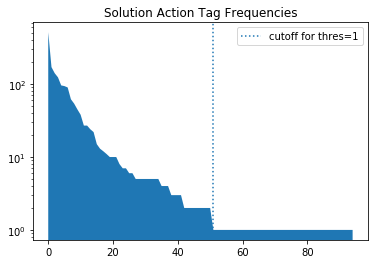

In [25]:
mask_s_Action = df.s_Action.notnull().tolist() 
#BROKEN :(
s_actions = df.s_Action[mask_s_Action].apply(lambda x: x.split(', ')).tolist()


from sklearn.preprocessing import MultiLabelBinarizer

multi_bin =  MultiLabelBinarizer().fit(s_actions)
Y_temp = multi_bin.transform(s_actions)
print 'using all classes', Y_temp.shape
# print np.sort(Y_temp.sum(axis=0))[::-1]
plt.fill_between(range(Y_temp.shape[1]), np.sort(Y_temp.sum(axis=0))[::-1])
plt.yscale('log')

thres = 1
plt.title('Solution Action Tag Frequencies')
used_classes = multi_bin.classes_[Y_temp.sum(axis=0)>thres]
s_act_thres = pd.Series([[i for i in s if i in used_classes] for s in s_actions])
mask = [i!=list([]) for i in s_act_thres.values]
s_act_thres = s_act_thres[mask]
binlab = MultiLabelBinarizer().fit(s_act_thres)
Y_train = binlab.transform(s_act_thres)
plt.axvline(Y_train.shape[1], ls=':', label='cutoff for thres={}'.format(thres))
plt.legend()
print 'using non-unique classes', Y_train.shape

In [142]:
s_act_thres
df.s_Action[[i=='[]' for i in df.s_Action.values]]

Series([], Name: s_Action, dtype: object)

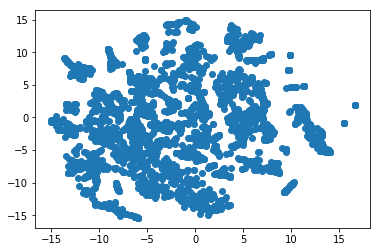

In [26]:
from sklearn.manifold import TSNE


model = TSNE()
X_proj = model.fit_transform(X_lsa) 
plt.scatter(X_proj[:,0],X_proj[:,1])

In [37]:
X_lsa[0]

array([ 0.01435114,  0.03207383,  0.02332928, -0.01704821, -0.03942003,
       -0.00622737, -0.02409078,  0.01866447, -0.01371956, -0.03754695,
       -0.00818423, -0.02621014, -0.02632895,  0.03315192,  0.01924376,
        0.01679267, -0.01849451, -0.03503696, -0.0783184 ,  0.0177486 ])

In [27]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [31]:
X_train = X_nmf[mask_s_Action][mask]
X_test = X_nmf[np.logical_not(mask_s_Action)]

clf = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovr'))
clf.fit(X_train, Y_train)
print clf.score(X_train, Y_train)

0.064404432133


In [33]:


X_train = X_lsa[mask_s_Action][mask]
# X_test = X_lsa[np.logical_not(mask_s_Action)]

clf = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovr', shrinking=False, probability=True))
clf.fit(X_train, Y_train)
print clf.score(X_train, Y_train)


0.27216066482


In [34]:
pd.DataFrame(data={'Pred':[str(', '.join(i)) for i in binlab.inverse_transform(clf.predict(X_train))],
             'True':[str(', '.join(i)) for i in binlab.inverse_transform(Y_train)]})

,Pred,True
0,replace,replace
1,,"order, repair"
2,charge,no_problem_detected
3,,"need_guy, replace"
4,,"complete, rewire"
5,,"remove, replace"
6,charge,"charge, check"
7,,repair
8,replace,replace
9,,"clean, remove"


In [110]:
df_out = df.copy()
df_out['s_Actions_Pred'] = [str(', '.join(i)) for i in binlab.inverse_transform(clf.predict(X_lsa))]

In [105]:
df_out.to_excel('svc_multLab_1.xlsx')